In [16]:
import pandas as pd
import numpy as np

In [17]:
new_good=pd.read_csv('/Users/zhilinyang/Desktop/work/new_good2.csv')
new_good=new_good.iloc[:,1:]
new_good.head()

,SID,label,SMART_1,SMART_3,SMART_5,SMART_7,SMART_9,SMART_187,SMART_189,SMART_194,...,SMART_197,RAW_5,RAW_197,cg_1,cg_5,cg_187,cg_195,cg_197,cgr_5,cgr_197
0,434.0,1.0,0.387097,1.0,0.979798,0.536585,0.157895,1.0,-1.0,-0.542857,...,1.0,-0.964083,-1.0,0.096774,0.0,0.0,0.000000,0.0,0.0,0.0
1,434.0,1.0,0.387097,1.0,0.979798,0.536585,0.157895,1.0,-1.0,-0.542857,...,1.0,-0.964083,-1.0,0.064516,0.0,0.0,0.043011,0.0,0.0,0.0
2,434.0,1.0,0.419355,1.0,0.979798,0.536585,0.157895,1.0,-1.0,-0.485714,...,1.0,-0.964083,-1.0,0.064516,0.0,0.0,0.064516,0.0,0.0,0.0
3,434.0,1.0,0.451613,1.0,0.979798,0.536585,0.157895,1.0,-1.0,-0.542857,...,1.0,-0.964083,-1.0,0.096774,0.0,0.0,0.000000,0.0,0.0,0.0
4,434.0,1.0,0.483871,1.0,0.979798,0.536585,0.157895,1.0,-1.0,-0.542857,...,1.0,-0.964083,-1.0,0.096774,0.0,0.0,0.021506,0.0,0.0,0.0


In [18]:
good_list=new_good['SID'].unique()
len(good_list)

22962

In [ ]:
new_bad=pd.read_csv('/Users/zhilinyang/Desktop/work/new_bad.csv')
new_bad=new_bad.iloc[:,1:]
new_bad.head(20)

In [20]:
bad_list=new_bad['SID'].unique()
len(bad_list)

433

In [13]:
train_df=pd.read_csv('/Users/zhilinyang/Desktop/work/train_df2.csv')
train_df=train_df.iloc[:,1:]
train_df.head()

,SID,SMART_1,SMART_3,SMART_5,SMART_7,SMART_9,SMART_187,SMART_189,SMART_194,SMART_195,SMART_197,RAW_5,RAW_197,cg_1,cg_5,cg_187,cg_195,cg_197,cgr_5,cgr_197
0,11868.0,0.258065,0.555556,1.0,0.390244,0.578947,1.00000,1.000000,-0.600000,-0.075269,1.0,-1.000000,-1.000000,0.129032,0.0,0.0,0.043011,0.0,0.0,0.0
1,6988.0,0.387097,1.000000,1.0,0.512195,0.157895,1.00000,1.000000,-0.257143,-0.032258,1.0,-0.999527,-1.000000,0.258065,0.0,0.0,0.021505,0.0,0.0,0.0
2,21300.0,0.419355,0.777778,1.0,0.317073,0.789474,1.00000,0.636364,-0.428571,-0.010753,1.0,-1.000000,-1.000000,0.129032,0.0,0.0,0.021506,0.0,0.0,0.0
3,307.0,0.193548,0.555556,1.0,0.560976,-0.052632,0.79798,0.939394,-0.828571,-0.053763,1.0,-0.991021,-0.997753,0.129033,0.0,0.0,0.000000,0.0,0.0,0.0
4,15293.0,0.290323,0.555556,1.0,0.414634,0.578947,1.00000,1.000000,-0.542857,-0.053763,1.0,-1.000000,-1.000000,0.129032,0.0,0.0,0.000000,0.0,0.0,0.0


In [21]:
y_train=np.ones(len(train_df))
y_train[train_df['SID'].isin(good_list)]=0

In [22]:
y_train[~train_df['SID'].isin(good_list)]=1

In [23]:
print(y_train[:20])

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.]


In [24]:
dropcols=['SMART_197','RAW_197','cg_5','cg_187','cg_197','cgr_197']
train_df=train_df.drop(dropcols,axis=1)

In [11]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy',min_samples_split = 20, min_samples_leaf = 7, min_impurity_decrease = 0.001,class_weight={0:1,1:10})

In [83]:
DT.fit(train_df.iloc[:,1:],y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
test_df=pd.read_csv('/Users/zhilinyang/Desktop/work/test_df2.csv')
test_df=test_df.iloc[:,1:]
test_df.head()

,SID,SMART_1,SMART_3,SMART_5,SMART_7,SMART_9,SMART_187,SMART_189,SMART_194,SMART_195,SMART_197,RAW_5,RAW_197,cg_1,cg_5,cg_187,cg_195,cg_197,cgr_5,cgr_197
0,4475.0,0.290323,1.000000,1.0,0.536585,0.052632,1.0,1.000000,-0.714286,-0.161290,1.0,-0.997637,-1.0,0.161290,0.0,0.0,0.086021,0.0,0.0,0.0
1,14671.0,0.387097,0.555556,1.0,0.390244,0.578947,1.0,0.030303,-0.600000,-0.010753,1.0,-1.000000,-1.0,0.032258,0.0,0.0,0.064516,0.0,0.0,0.0
2,19920.0,0.419355,0.259259,1.0,0.390244,0.789474,1.0,1.000000,-0.485714,-0.032258,1.0,-1.000000,-1.0,0.064516,0.0,0.0,0.021505,0.0,0.0,0.0
3,2785.0,0.387097,1.000000,1.0,0.560976,0.052632,1.0,1.000000,-0.600000,-0.290323,1.0,-0.997637,-1.0,0.161291,0.0,0.0,0.021505,0.0,0.0,0.0
4,13665.0,0.387097,0.555556,1.0,0.414634,0.578947,1.0,1.000000,-0.371429,-0.096774,1.0,-1.000000,-1.0,0.193549,0.0,0.0,0.021505,0.0,0.0,0.0


In [38]:
y_test=pd.read_csv('/Users/zhilinyang/Desktop/work/y_test2.csv',header=None)
y_test=y_test.iloc[:,1:]
y_test.head()

,1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [26]:
from sklearn.metrics import confusion_matrix
def FDR(y_true, y_pred):
    mat=confusion_matrix(y_true=y_true,y_pred=y_pred)
    TP=mat[1,1]
    FN=mat[1,0]
    FDR=TP/(TP+FN)
    return FDR

In [27]:
def FAR(y_true, y_pred):
    mat=confusion_matrix(y_true=y_true,y_pred=y_pred)
    FP=mat[0,1]
    TN=mat[0,0]
    FAR=FP/(FP+TN)
    return FAR

In [28]:
def disk_state(testset,y_true,disk_name_list):
    result=[]
    test_set=testset.groupby('SID')
    for disk in disk_name_list:
        sample_index=test_set.get_group(disk).index
        sample_result=y_true.reindex(sample_index)
        sample_result=sample_result.values
        if sample_result.sum():
            result.append(1)
        else:
            result.append(0)
    return result

In [29]:
def disk_FDR(x_test,y_pred,y_test):
    disk_pred=predict_disk(x_test,y_pred,x_test['SID'].unique())
    true_state=disk_state(x_test,y_test,x_test['SID'].unique())
    true_state=np.array(true_state)
    disk_pred=np.array(disk_pred)
    diskfdr=FDR(true_state, disk_pred)
    return diskfdr

In [30]:
def disk_FAR(x_test,y_pred,y_test):
    disk_pred=predict_disk(x_test,y_pred,x_test['SID'].unique())
    true_state=disk_state(x_test,y_test,x_test['SID'].unique())
    true_state=np.array(true_state)
    disk_pred=np.array(disk_pred)
    diskfdr=FAR(true_state, disk_pred)
    return diskfdr

In [31]:
def predict_disk(testset,y_pred,disk_name_list):
    result=[]
    test_set=testset.groupby('SID')
    y_pred=pd.Series(y_pred)
    for disk in disk_name_list:
        sample_index=test_set.get_group(disk).index
        sample_result=y_pred.reindex(sample_index)
        sample_result=pd.Series(sample_result)
        if sample_result.sum()>len(sample_result)/2:
            result.append(1)
        else:
            result.append(0)
    return result

In [48]:
disk_FDR(test_df,y_pred,y_test) #For DT

0.96124031007751942

In [32]:
fail_list=new_bad['SID'].unique()
len(fail_list)

433

In [33]:
train_list=train_df['SID'].unique()

In [34]:
def get_new_test(N,good_df,fail_df,train_list):
    x_test=pd.DataFrame()
    groups=good_df.groupby('SID')
    my_good=pd.Series(good_list).sample(frac=0.3).values
    for name in my_good:
        grp=groups.get_group(name)
        sample=grp.iloc[len(grp)-N:len(grp)]
        x_test=x_test.append(sample)
    good_num=len(x_test)
    
    groups=fail_df.groupby('SID')
    for name in pd.Series(fail_list).sample(frac=0.9):
        if name not in train_list:
            grp=groups.get_group(name)
            sample=grp.iloc[len(grp)-N:len(grp)]
            x_test=x_test.append(sample)
    
    x_test=x_test.drop(dropcols,axis=1)
    y_test=[0 for i in range(0,good_num)]+[1 for i in range(good_num,len(x_test))]
    y_test=np.array(y_test)
    return x_test,y_test

In [85]:
new_x_test,new_y_test=get_new_test(3,new_good,new_bad,train_list)

In [86]:
print(len(new_x_test),len(new_y_test))

21021 21021


In [66]:
len(pd.Series(good_list).sample(frac=0.3))

6889

In [90]:
new_x_test=new_x_test.drop('label',axis=1)
new_x_test.head()

,SID,SMART_1,SMART_3,SMART_5,SMART_7,SMART_9,SMART_187,SMART_189,SMART_194,SMART_195,RAW_5,cg_1,cg_195,cgr_5
641737,4399.0,0.451613,1.0,1.0,0.560976,0.052632,1.0,0.69697,-0.428571,-0.118280,-0.999527,0.129032,0.021506,0.0
641738,4399.0,0.451613,1.0,1.0,0.560976,0.052632,1.0,0.69697,-0.485714,-0.118280,-0.999527,0.096774,0.021506,0.0
641739,4399.0,0.451613,1.0,1.0,0.560976,0.052632,1.0,0.69697,-0.485714,-0.139785,-0.999527,0.064516,0.021505,0.0
1594327,10289.0,0.387097,1.0,1.0,0.268293,0.578947,1.0,1.00000,-0.714286,-0.118280,-1.000000,0.129032,0.021506,0.0
1594328,10289.0,0.419355,1.0,1.0,0.268293,0.578947,1.0,1.00000,-0.657143,-0.118280,-1.000000,0.129032,0.000000,0.0


In [91]:
new_x_test.index=range(0,len(new_x_test))
y_pred=DT.predict(new_x_test.iloc[:,1:])
disk_FDR(new_x_test,y_pred,pd.Series(new_y_test))

0.96610169491525422

In [87]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh',alpha=0.02, hidden_layer_sizes=(20, 1), max_iter=400, learning_rate_init=0.1)

In [88]:
clf.fit(train_df.iloc[:,1:], y_train)

MLPClassifier(activation='tanh', alpha=0.02, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 1), learning_rate='constant',
       learning_rate_init=0.1, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [89]:
def voting(N):
    x_test,y_test=get_new_test(N,new_good,new_bad,train_list)
    y_test=pd.Series(y_test)
    x_test=x_test.drop('label',axis=1)
    x_test.index=range(0,len(x_test))
    y_predDT=DT.predict(x_test.iloc[:,1:])
    FDR1=disk_FDR(x_test,y_predDT,y_test)
    FAR1=disk_FAR(x_test,y_predDT,y_test) 
    y_predNN=clf.predict(x_test.iloc[:,1:])
    FDR2=disk_FDR(x_test,y_predNN,y_test) 
    FAR2=disk_FAR(x_test,y_predNN,y_test) 
    print("vote: %d DT FDR: %f, DT FAR: %f, NN FDR: %f, NN FAR: %f"% (N, FDR1, FAR1, FDR2, FAR2))

In [93]:
voting(1)
voting(3)
voting(5)
voting(7)
voting(9)
voting(11)
voting(15)
voting(17)
voting(27)

vote: 1 DT FDR: 0.958333, DT FAR: 0.010016, NN FDR: 0.766667, NN FAR: 0.003339
vote: 3 DT FDR: 0.957265, DT FAR: 0.010451, NN FDR: 0.769231, NN FAR: 0.002758
vote: 5 DT FDR: 0.958333, DT FAR: 0.011468, NN FDR: 0.766667, NN FAR: 0.002613
vote: 7 DT FDR: 0.974138, DT FAR: 0.010306, NN FDR: 0.767241, NN FAR: 0.002903
vote: 9 DT FDR: 0.957265, DT FAR: 0.009580, NN FDR: 0.769231, NN FAR: 0.003048
vote: 11 DT FDR: 0.964912, DT FAR: 0.008855, NN FDR: 0.745614, NN FAR: 0.002323
vote: 15 DT FDR: 0.974576, DT FAR: 0.005661, NN FDR: 0.762712, NN FAR: 0.002613
vote: 17 DT FDR: 0.973913, DT FAR: 0.007258, NN FDR: 0.791304, NN FAR: 0.002903
vote: 27 DT FDR: 0.975000, DT FAR: 0.008855, NN FDR: 0.750000, NN FAR: 0.003484


No handles with labels found to put in legend.


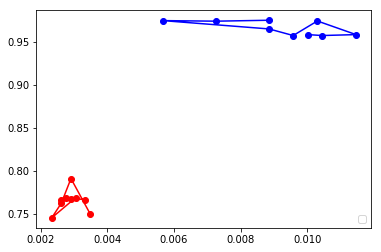

In [1]:
import matplotlib.pyplot as plt
x1=[0.010016,0.010451,0.011468,0.010306,0.009580,0.008855,0.005661,0.007258,0.008855]
x2=[0.003339,0.002758,0.002613,0.002903,0.003048,0.002323,0.002613,0.002903,0.003484]
y1=[0.958333,0.957265,0.958333,0.974138,0.957265,0.964912,0.974576,0.973913,0.975000]
y2=[0.766667,0.769231,0.766667,0.767241,0.769231,0.745614,0.762712,0.791304,0.750000]

plt.plot(x1, y1, color='blue', marker='o')
plt.plot(x2, y2, color='red', marker='o')
plt.legend(loc='lower right')
plt.show()

In [4]:
import numpy as np
indices1=np.argsort(np.array(x1))

array([6, 7, 5, 8, 4, 0, 3, 1, 2])

In [6]:
y1=np.array(y1)[indices1]
y1

array([ 0.974576,  0.973913,  0.964912,  0.975   ,  0.957265,  0.958333,
        0.974138,  0.957265,  0.958333])

In [7]:
indices2=np.argsort(np.array(x2))
y2=np.array(y2)[indices2]
y2

array([ 0.745614,  0.766667,  0.762712,  0.769231,  0.767241,  0.791304,
        0.769231,  0.766667,  0.75    ])

In [9]:
x1=np.sort(np.array(x1))
x2=np.sort(np.array(x2))

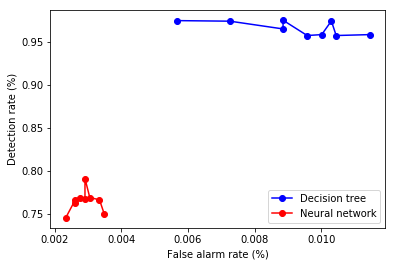

In [11]:
plt.plot(x1, y1, color='blue', marker='o',label='Decision tree')
plt.plot(x2, y2, color='red', marker='o',label='Neural network')
plt.xlabel('False alarm rate (%)')
plt.ylabel('Detection rate (%)')
plt.legend(loc='lower right')
plt.show()

In [107]:
def TIA(classifier):
    groups=new_bad.groupby('SID')
    stat=[]
    for name in fail_list:
        if name not in train_list:
            grp=groups.get_group(name)
            grp=grp.drop(dropcols,axis=1)
            pred=classifier.predict(grp.iloc[:,2:])
            tia=0
            for ind in range(0,len(pred)):
                if pred[ind]==1:
                    tia=len(pred)-ind
                    break
            stat.append(tia)
    return stat    

In [108]:
DTstat=TIA(DT)

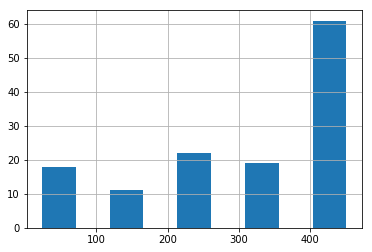

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.Series(DTstat).hist(bins=5,rwidth=0.5)

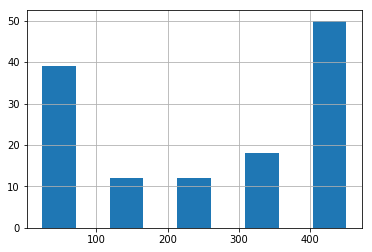

In [133]:
NNstat=TIA(clf)
pd.Series(NNstat).hist(bins=5,rwidth=0.5)

In [12]:
train_df.head()

,SID,SMART_1,SMART_3,SMART_5,SMART_7,SMART_9,SMART_187,SMART_189,SMART_194,SMART_195,RAW_5,cg_1,cg_195,cgr_5
0,11868.0,0.258065,0.555556,1.0,0.390244,0.578947,1.00000,1.000000,-0.600000,-0.075269,-1.000000,0.129032,0.043011,0.0
1,6988.0,0.387097,1.000000,1.0,0.512195,0.157895,1.00000,1.000000,-0.257143,-0.032258,-0.999527,0.258065,0.021505,0.0
2,21300.0,0.419355,0.777778,1.0,0.317073,0.789474,1.00000,0.636364,-0.428571,-0.010753,-1.000000,0.129032,0.021506,0.0
3,307.0,0.193548,0.555556,1.0,0.560976,-0.052632,0.79798,0.939394,-0.828571,-0.053763,-0.991021,0.129033,0.000000,0.0
4,15293.0,0.290323,0.555556,1.0,0.414634,0.578947,1.00000,1.000000,-0.542857,-0.053763,-1.000000,0.129032,0.000000,0.0


In [35]:
new_x_test,new_y_test=get_new_test(11,new_good,new_bad,train_list)

In [36]:
new_x_test=new_x_test.drop('label',axis=1)

In [37]:
new_x_test.head()

,SID,SMART_1,SMART_3,SMART_5,SMART_7,SMART_9,SMART_187,SMART_189,SMART_194,SMART_195,RAW_5,cg_1,cg_195,cgr_5
839819,5622.0,0.354839,1.0,1.0,0.536585,0.052632,1.0,1.0,-0.257143,-0.204301,-0.998582,0.064516,0.064516,0.0
839820,5622.0,0.387097,1.0,1.0,0.536585,0.052632,1.0,1.0,-0.200000,-0.182796,-0.998582,0.064516,0.043011,0.0
839821,5622.0,0.387097,1.0,1.0,0.536585,0.052632,1.0,1.0,-0.200000,-0.204301,-0.998582,0.387097,0.043011,0.0
839822,5622.0,0.419355,1.0,1.0,0.536585,0.052632,1.0,1.0,-0.200000,-0.204301,-0.998582,0.258065,0.021505,0.0
839823,5622.0,0.451613,1.0,1.0,0.536585,0.052632,1.0,1.0,-0.314286,-0.204301,-0.998582,0.225807,0.021505,0.0


In [38]:
def smaller_set(trainset, y_train, good_list, bad_list, fraction):
    trainset['label']=np.array(y_train)
    small_good=list(pd.Series(good_list).sample(frac=fraction))
    s1=set(bad_list)
    s2=set(trainset['SID'])
    small=list(s1 & s2)
    small_bad=list(pd.Series(small).sample(frac=fraction))
    small_names=np.array(small_good+small_bad)
    new_set=trainset[trainset['SID'].isin(small_names)]
    label=new_set['label']
    new_set=new_set.drop('label',axis=1)
    new_set.index=range(0,len(new_set))
    return new_set,np.array(label)

In [28]:
train_A,label=smaller_set(train_df, y_train, good_list, bad_list, 0.1)

In [29]:
train_A.head()

,SID,SMART_1,SMART_3,SMART_5,SMART_7,SMART_9,SMART_187,SMART_189,SMART_194,SMART_195,RAW_5,cg_1,cg_195,cgr_5
0,3913.0,0.419355,1.000000,1.0,0.560976,0.052632,1.0,0.898990,-0.657143,-0.161290,-1.000000,0.064516,0.086021,0.0
1,12711.0,0.419355,0.555556,1.0,0.439024,0.578947,1.0,0.979798,-0.600000,-0.010753,-0.999527,0.032258,0.021505,0.0
2,21185.0,0.258065,-0.037037,1.0,0.292683,0.789474,1.0,0.919192,-0.485714,-0.010753,-1.000000,0.161290,0.021505,0.0
3,6110.0,0.193548,1.000000,1.0,0.512195,0.157895,1.0,0.777778,-0.600000,-0.161290,-0.986767,0.225807,0.000000,0.0
4,13272.0,0.387097,0.555556,1.0,0.414634,0.578947,1.0,0.959596,-0.600000,-0.247312,-1.000000,0.193549,0.000000,0.0


In [30]:
len(train_A)

7248

In [31]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy',min_samples_split = 20, min_samples_leaf = 7, min_impurity_decrease = 0.001,class_weight={0:1,1:10})

In [32]:
new_y_test

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
new_x_test.index=range(0,len(new_x_test))
new_x_test.head()

,SID,SMART_1,SMART_3,SMART_5,SMART_7,SMART_9,SMART_187,SMART_189,SMART_194,SMART_195,RAW_5,cg_1,cg_195,cgr_5
0,20550.0,0.419355,0.259259,1.0,0.390244,0.789474,1.0,1.0,-0.428571,-0.032258,-1.0,0.129032,0.043011,0.0
1,20550.0,0.451613,0.259259,1.0,0.390244,0.789474,1.0,1.0,-0.542857,-0.010753,-1.0,0.161290,0.021505,0.0
2,20550.0,0.161290,0.259259,1.0,0.390244,0.789474,1.0,1.0,-0.542857,-0.010753,-1.0,0.193549,0.000000,0.0
3,20550.0,0.258065,0.259259,1.0,0.390244,0.789474,1.0,1.0,-0.542857,-0.010753,-1.0,0.129032,0.000000,0.0
4,20550.0,0.290323,0.259259,1.0,0.390244,0.789474,1.0,1.0,-0.542857,-0.032258,-1.0,0.096774,0.021505,0.0


In [34]:
DT.fit(train_A.iloc[:,1:],label)

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
y_pred=DT.predict(new_x_test.iloc[:,1:])

In [36]:
disk_FDR(new_x_test,y_pred,pd.Series(new_y_test))

0.81512605042016806

In [40]:
def diff_set(percent):
    train,label=smaller_set(train_df, y_train, good_list, bad_list, percent)
    DT.fit(train.iloc[:,1:],label)
    y_pred=DT.predict(new_x_test.iloc[:,1:])
    fdr=disk_FDR(new_x_test,y_pred,pd.Series(new_y_test))
    far=disk_FAR(new_x_test,y_pred,pd.Series(new_y_test))
    print('FDR:%f FAR:%f'%(fdr,far))

In [41]:
diff_set(0.1)
diff_set(0.25)
diff_set(0.5)
diff_set(0.75)

FDR:0.840336 FAR:0.008419
FDR:0.823529 FAR:0.002903
FDR:0.890756 FAR:0.006822
FDR:0.915966 FAR:0.006242


In [43]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh',alpha=0.03, hidden_layer_sizes=(20, 1), max_iter=400, learning_rate_init=0.1)

In [44]:
def diff_set2(percent):
    train,label=smaller_set(train_df, y_train, good_list, bad_list, percent)
    clf.fit(train.iloc[:,1:],label)
    y_pred=clf.predict(new_x_test.iloc[:,1:])
    fdr=disk_FDR(new_x_test,y_pred,pd.Series(new_y_test))
    far=disk_FAR(new_x_test,y_pred,pd.Series(new_y_test))
    print('FDR:%f FAR:%f'%(fdr,far))

In [41]:
new_x_test.index=range(0,len(new_x_test))

In [45]:
diff_set2(0.1)
diff_set2(0.25)
diff_set2(0.5)
diff_set2(0.75)

FDR:0.576271 FAR:0.003774
FDR:0.762712 FAR:0.002323
FDR:0.669492 FAR:0.000145
FDR:0.669492 FAR:0.004210
